Rừng ngẫu nhiên

Độ chính xác trên tập huấn luyện: 96.0
Độ chính xác trên tập kiểm tra: 78.0


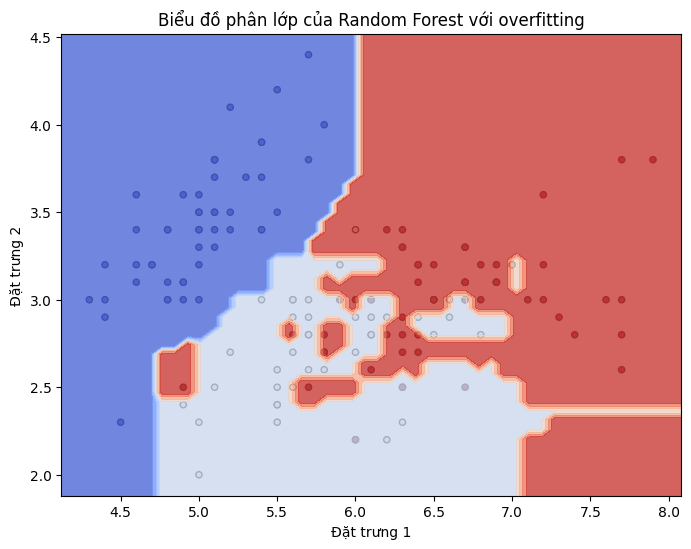

In [6]:
from os import RWF_SYNC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dữ liệu Iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Tách tập dữ liệu thành tập huấn luyện và kiểm tra
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=1/3, random_state=42)

rf_overfit = RandomForestClassifier(n_estimators=100, random_state=20)

# Huấn luyện mô hình
rf_overfit.fit(X_Train, Y_Train)

train_accuracy = rf_overfit.score(X_Train, Y_Train)*100
print("Độ chính xác trên tập huấn luyện:",train_accuracy )


# Đánh giá mô hình trên tập kiểm tra
test_accuracy = rf_overfit.score(X_Test, Y_Test)*100
print("Độ chính xác trên tập kiểm tra:",test_accuracy )

# Vẽ biểu đồ phân lớp
plt.figure(figsize=(8,6))

# Biểu diễn các điểm dữ liệu thuộc các lớp khác nhau
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,
s=20, edgecolors='k')

# Vẽ ranh giới quyết định của mô hình
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Tạo lưới để đánh giá mô hình
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

Z = rf_overfit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

plt.xlabel('Đặt trưng 1')
plt.ylabel('Đặt trưng 2')
plt.title('Biểu đồ phân lớp của Random Forest với overfitting')
plt.show()


Overfitting of Boosting

Độ chính xác trên tập huấn luyện: 96.0
Độ chính xác trên tập kiểm tra: 66.0


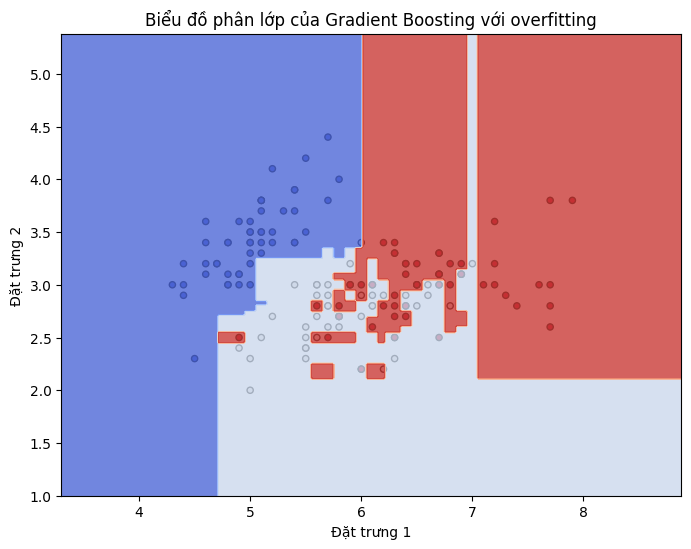

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Load dữ liệu Iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Tách tập dữ liệu thành tập huấn luyện và kiểm tra
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=1/3, random_state=42)

gb_clf_overfit = GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=1.0, max_depth=3, random_state=42)

# Huấn luyện mô hình
gb_clf_overfit.fit(X_Train, Y_Train)

train_accuracy = gb_clf_overfit.score(X_Train, Y_Train)*100
print("Độ chính xác trên tập huấn luyện:",train_accuracy )


# Đánh giá mô hình trên tập kiểm tra
test_accuracy = gb_clf_overfit.score(X_Test, Y_Test)*100
print("Độ chính xác trên tập kiểm tra:",test_accuracy )

# Vẽ biểu đồ phân lớp
plt.figure(figsize=(8,6))

# Biểu diễn các điểm dữ liệu thuộc các lớp khác nhau
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,
s=20, edgecolors='k')

# Tạo lưới để đánh giá mô hình
x_min, x_max = X[:, 0].min() - 1, X[:, 0 ].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1 ].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = gb_clf_overfit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

plt.xlabel('Đặt trưng 1')
plt.ylabel('Đặt trưng 2')
plt.title('Biểu đồ phân lớp của Gradient Boosting với overfitting')
plt.show()


Overfitting

Độ chính xác trên tập huấn luyện: 100.0
Độ chính xác trên tập kiểm tra: 98.0


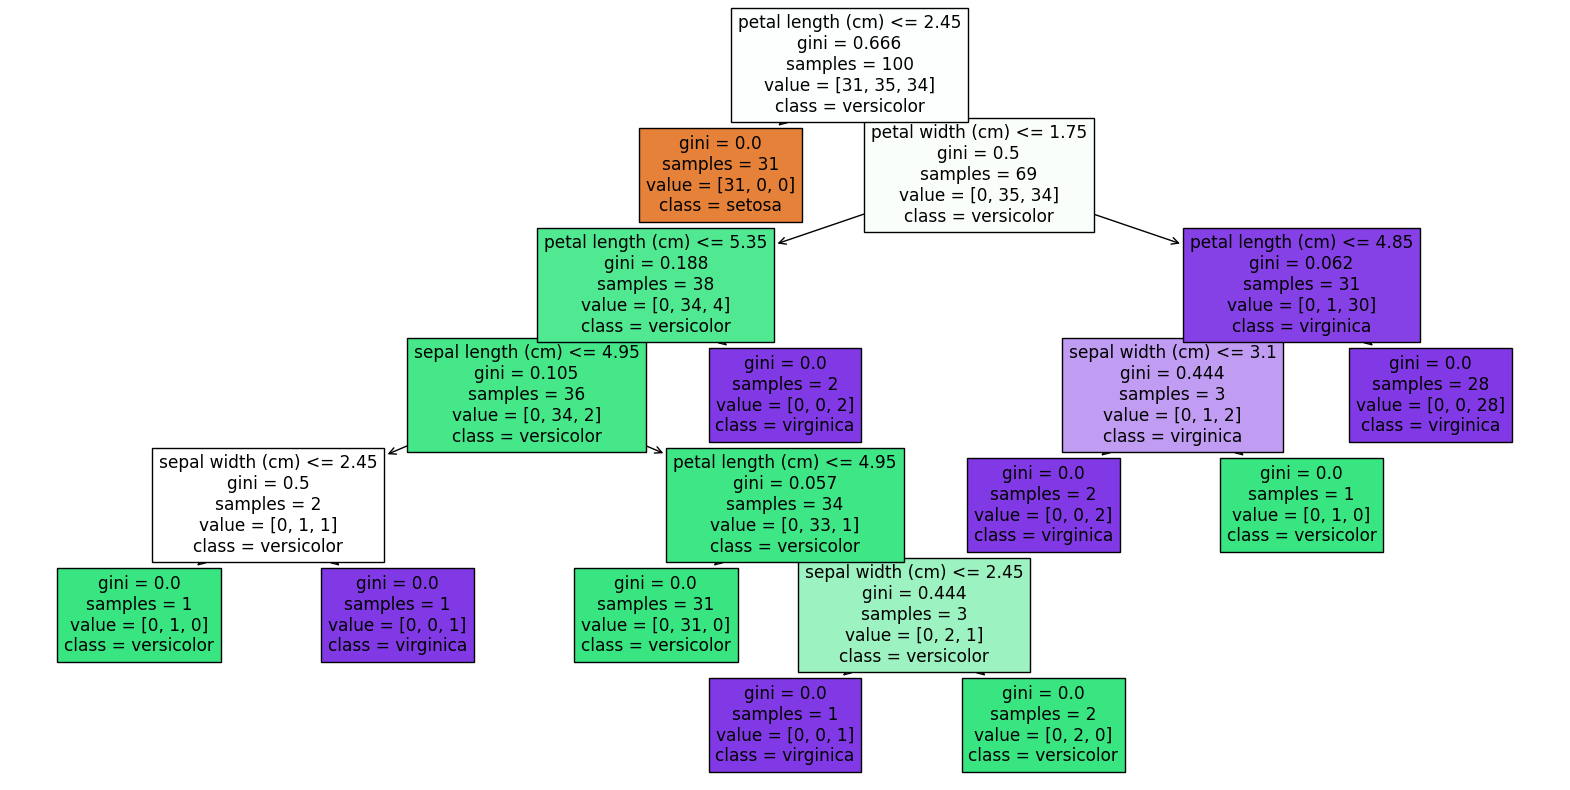

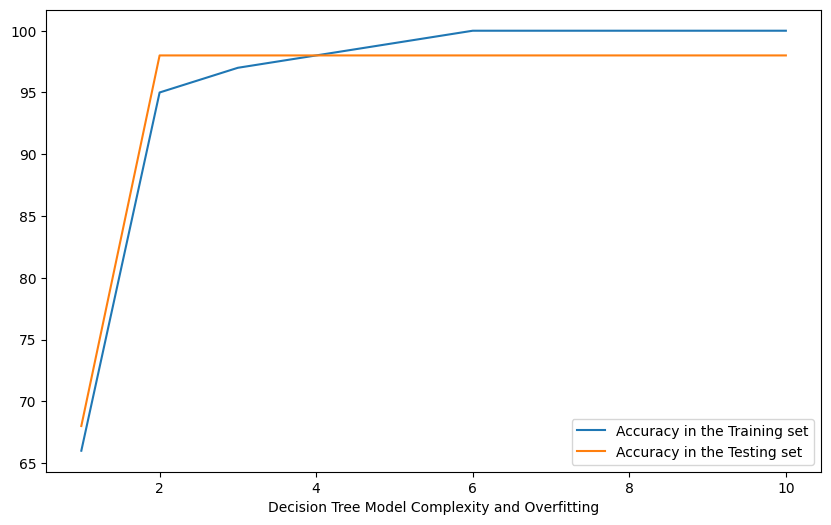

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


# Load dữ liệu Iris
iris = load_iris()
X = iris.data
y = iris.target

# Tách tập dữ liệu thành tập huấn luyện và kiểm tra
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=1/3, random_state=42)

clf = DecisionTreeClassifier(max_depth=None, random_state=42)
# Huấn luyện mô hình
clf.fit(X_Train, Y_Train)

train_accuracy = accuracy_score(Y_Train, clf.predict(X_Train))*100
print("Độ chính xác trên tập huấn luyện:",train_accuracy )


# Đánh giá mô hình trên tập kiểm tra
test_accuracy = accuracy_score(Y_Test, clf.predict(X_Test))*100
print("Độ chính xác trên tập kiểm tra:",test_accuracy )

# Vẽ biểu đồ phân lớp
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


train_accuracies = []
test_accuracies = []

depth_range = range(1, 11)
for depth in depth_range:
  clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
  # Huấn luyện mô hình
  clf.fit(X_Train, Y_Train)

  train_accuracies.append(accuracy_score(Y_Train, clf.predict(X_Train))*100)
  test_accuracies.append(accuracy_score(Y_Test, clf.predict(X_Test))*100)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.plot(depth_range, train_accuracies, label='Accuracy in the Training set')
plt.plot(depth_range, test_accuracies, label='Accuracy in the Testing set')
plt.xlabel('Decision Tree Model Complexity and Overfitting')
plt.legend()
plt.show()
